# Stock Price Prediction Using Python and the LSTM Machine Learning Model

## Install Necessary Packages

In [ ]:
# !pip install python-math
# !pip install yfinance
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install keras
# !pip install matplotlib

## Importing Necessary Libraries

In [8]:
# Import the nescessary Libraries
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

##  Creating a Ticker Object for TSLA

In [9]:
# Create a Ticker object for TSLA
tsla = yf.Ticker("TSLA")

# Get the stock historical data
df = tsla.history(start='2019-01-01', end='2022-12-31')

# Print the first few rows of the DataFrame
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,20.406668,21.008667,19.920000,20.674667,174879000,0.0,0.0
2019-01-03 00:00:00-05:00,20.466667,20.626667,19.825333,20.024000,104478000,0.0,0.0
2019-01-04 00:00:00-05:00,20.400000,21.200001,20.181999,21.179333,110911500,0.0,0.0
2019-01-07 00:00:00-05:00,21.448000,22.449333,21.183332,22.330667,113268000,0.0,0.0
2019-01-08 00:00:00-05:00,22.797333,22.934000,21.801332,22.356667,105127500,0.0,0.0


In [10]:
# Data Frame Shape(Rows & Columns)
df.shape

(1008, 7)

## Heatmap showing the correlation between different variables in the data set.

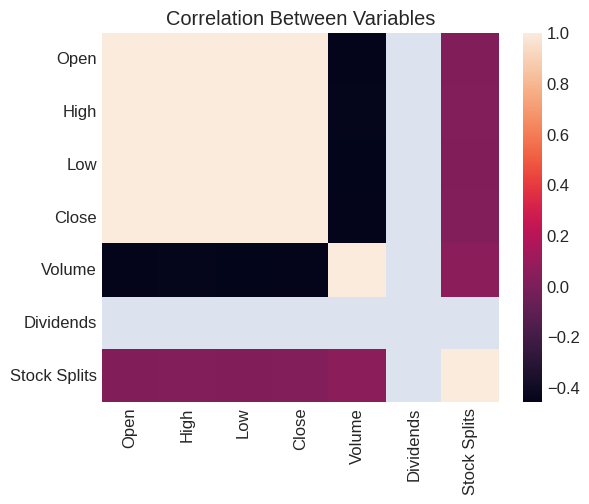

In [141]:
import seaborn as sns

sns.heatmap(df.corr())
plt.title('Correlation Between Variables')
plt.show()

## Visualizing the closing Price

Text(0, 0.5, 'Closing Price in USD$')

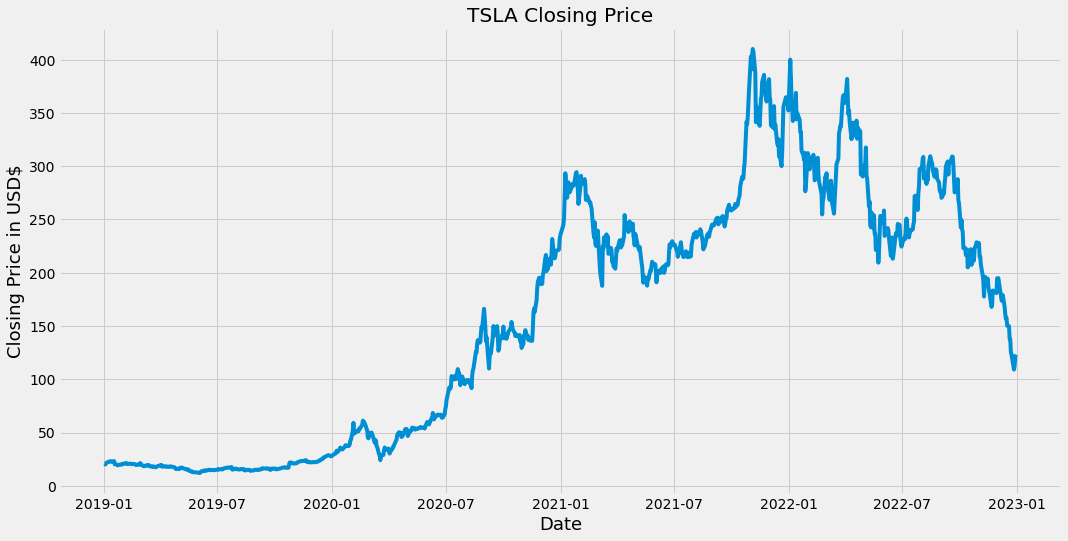

In [12]:
# Visualize the closing Price

plt.figure(figsize = (16,8))
plt.title('TSLA Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price in USD$', fontsize = 18)

In [16]:
# Create a new Df with only the Close column
Close_data = df.filter(['Close'])

#Convert the DF to a numpy array
Close_dataset = Close_data.values

# Get the number of rows to train the model
training_data_len = math.ceil(len(Close_dataset) * 0.8) #0.8 for 80% of the data

training_data_len

807

### Importance of Scaling Data for Neural Network Performance

1.   Improved model performance: Scaling the data helps to improve the performance of the neural network by ensuring that the data is within the same range and not biased towards any particular feature. This helps the network to learn and converge faster, leading to better accuracy and generalization.

2.   Reduced training time: Without scaling, the neural network may take longer to train due to the varying ranges of the features. Scaling the data helps to bring all the features to a similar range, reducing the training time and computational requirements.

3.   Better feature representation: Scaling the data helps to highlight the important features and reduce the impact of noise or irrelevant features. This leads to a better representation of the data and helps the neural network to learn more meaningful patterns and relationships.





In [21]:
# Scale the data

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(Close_dataset)

scaled_data

array([[0.02196604],
       [0.02033136],
       [0.02323392],
       ...,
       [0.25318813],
       [0.27607536],
       [0.27949211]])

##  Creating the Training and Scaled Training Dataset

In [28]:
# Create the Training Dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :] # Contains all the values from index 0 to training_data_len and all the columns

# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i, 0]) # Contains 60 values and those values indexed from position 0 to position 59
  y_train.append(train_data[i, 0]) # Contains 61 value which will be at position 60
  if i<= 60:
    print('x_train Dataset:', x_train)
    print('y_train Dataset:', y_train)
    print()

x_train Dataset: [array([0.02196604, 0.02033136, 0.02323392, 0.02612644, 0.02619176,
       0.02672437, 0.02780299, 0.02818654, 0.02603265, 0.02771255,
       0.02798388, 0.02819492, 0.02064959, 0.02009018, 0.01819254,
       0.01884909, 0.0197753 , 0.01966476, 0.01984565, 0.02173993,
       0.02144683, 0.02231609, 0.02242998, 0.02384693, 0.02315521,
       0.0215289 , 0.0212425 , 0.02242161, 0.02224909, 0.02163944,
       0.02090249, 0.02159087, 0.02121569, 0.02069984, 0.01880219,
       0.01938505, 0.02006505, 0.01991264, 0.02273984, 0.02360072,
       0.01939845, 0.01781904, 0.0163418 , 0.01629155, 0.01635017,
       0.01761471, 0.01875027, 0.01748407, 0.018422  , 0.01858949,
       0.01615588, 0.01516101, 0.01482268, 0.01584938, 0.01591973,
       0.01433026, 0.01364189, 0.01487293, 0.01605539, 0.01669017])]
y_train Dataset: [0.016897857710496657]



In [29]:
# Convert the x_train and y_train to numpy arrays so we can use them to train the LSTM model
x_train,y_train = np.array(x_train), np.array(y_train)

### Reshape the data

*   Why Reshape?
*   Right now Our x_train Dataset is 2-Dimensional.
*   LSTM network expects the input to be in 3-Dimensional in the form of number of samples, number of time steps and number of features.

In [31]:
# x_train Dataset Shape
x_train.shape

(747, 60)

In [32]:
# Reshape the x_train Dataset
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(747, 60, 1)

##  Building the LSTM Model

In [34]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

##  Compiling the Model

In [35]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

##  Training the Model

In [36]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

747/747 [==============================] - 28s 33ms/step - loss: 0.0054


##  Creating the Testing Dataset

In [37]:
# Create the tesing dataset

# Create a new array containing scaled values from index 747 to 1047
test_data = scaled_data[training_data_len -60:, :]

# Create the datasets x_testa and y_test
x_test = []
y_test = Close_dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [38]:
# Convert the data into a numpy array
x_test = np.array(x_test)

In [41]:
# Reshape the Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

##  Obtaining the Model's Predicted Price Values

In [44]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 0s 16ms/step


## Root Mean Squared Error

In [45]:
# Get the root mean squared error (RMSE) to evaluate the model
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.130931114082906

In [50]:
# Calculate the range of the observed values
range_observed = max(y_test) - min(y_test)
  
# Determine whether the RMSE is acceptable
if rmse < (range_observed / 10):
  print("RMSE is acceptable.")
else:
  print("RMSE is not acceptable.")

RMSE is acceptable.


In the above code I said that the RMSE is considered acceptable if it is less than 10% of the range of the observed values.

## Other Evaluation Metrics

In [49]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error

# calculate (R2) R-squared
r2 = r2_score(y_test, predictions)
print("R-squared(R2)score:", r2)

# calculate MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean absolute error:", mae)

# calculate MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print("Mean absolute percentage error:", mape)

# calculate MSLE
msle = mean_squared_log_error(y_test, predictions)
print("Mean squared logarithmic error:", msle)


R-squared(R2)score: 0.8391486632307992
Mean absolute error: 18.06987379083586
Mean absolute percentage error: 0.07316628098784478
Mean squared logarithmic error: 0.008456987769311749


*   The R-squared score is a measure of how well the model fits the data. An R-squared score of 0.839 means that the model explains 83.9% of the variance in the data. This is generally considered a high R-squared score.

*   The mean absolute error (MAE) is the average absolute difference between the predicted values and the true values. A lower MAE indicates a better fit.

*   The mean absolute percentage error (MAPE) is the average absolute percentage difference between the predicted values and the true values. A lower MAPE indicates a better fit.

*   The mean squared logarithmic error (MSLE) is the average squared logarithmic difference between the predicted values and the true values. A lower MSLE indicates a better fit.

### Overall, these results suggest that the model is fitting the data well, with a high R-squared score and low error measures. 

##  Plotting and Visualizing the Data Results

<ipython-input-53-e3dfe6e53286>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


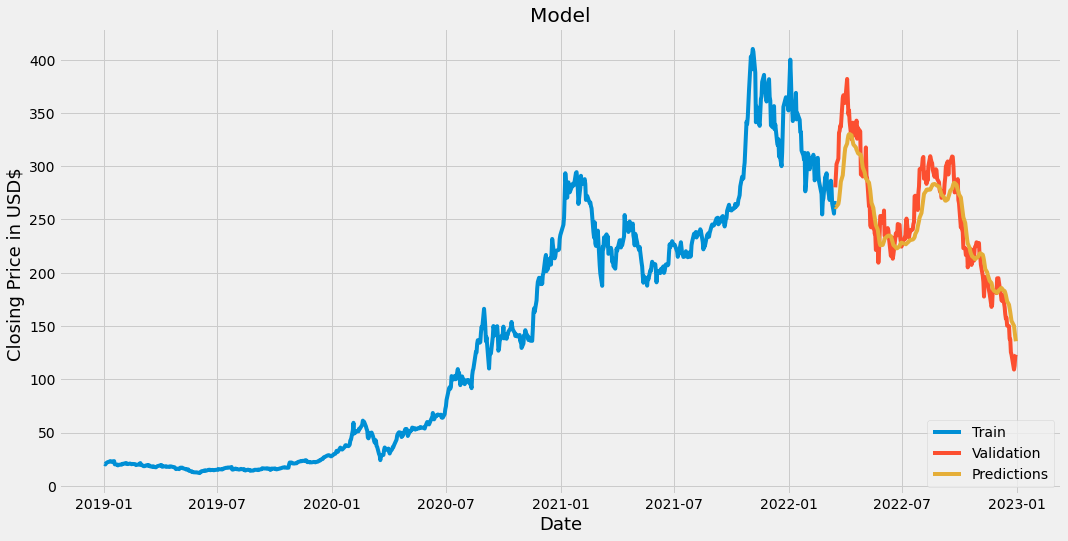

In [53]:
# Plot the data
train = Close_data[:training_data_len]
valid = Close_data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price in USD$ ', fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 'lower right')
plt.show()



1.   **Blue** Line indicates the data that the mdoel was **Trained** on.
2.   **Red** line is the **Actual** value for the rest of the days, which is the actual closing price for TESLA.
3. **Orange** line is the **Predictions**.


In [56]:
# Show the valid and Predicted Prices
valid.head(10)

,Close,Predictions
Date,,
2022-03-16 00:00:00-04:00,280.076660,261.918518
2022-03-17 00:00:00-04:00,290.533325,261.360321
2022-03-18 00:00:00-04:00,301.796661,262.180298
2022-03-21 00:00:00-04:00,307.053345,264.482758
2022-03-22 00:00:00-04:00,331.326660,267.805969
2022-03-23 00:00:00-04:00,333.036682,273.091431
2022-03-24 00:00:00-04:00,337.973328,279.143494
2022-03-25 00:00:00-04:00,336.880005,285.491516
2022-03-28 00:00:00-04:00,363.946655,291.406219


## Scatter plot showing the Actual and predicted closing prices.

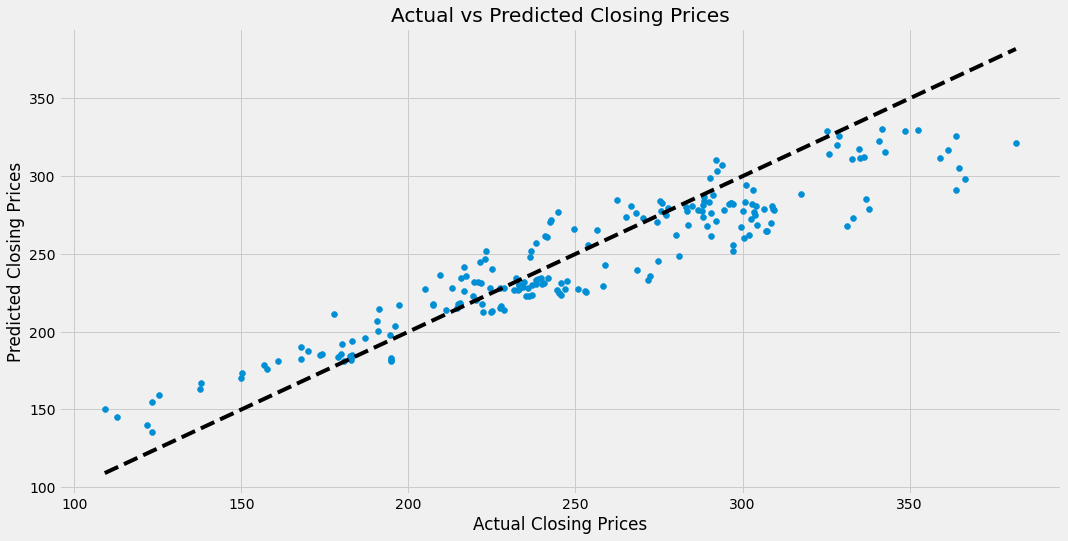

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,8))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs Predicted Closing Prices')
plt.show()

In [73]:
# TESLA dataframe from the initial top cell
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,20.406668,21.008667,19.920000,20.674667,174879000,0.0,0.0
2019-01-03 00:00:00-05:00,20.466667,20.626667,19.825333,20.024000,104478000,0.0,0.0
2019-01-04 00:00:00-05:00,20.400000,21.200001,20.181999,21.179333,110911500,0.0,0.0
2019-01-07 00:00:00-05:00,21.448000,22.449333,21.183332,22.330667,113268000,0.0,0.0
2019-01-08 00:00:00-05:00,22.797333,22.934000,21.801332,22.356667,105127500,0.0,0.0
2019-01-09 00:00:00-05:00,22.366667,22.900000,22.098000,22.568666,81493500,0.0,0.0
2019-01-10 00:00:00-05:00,22.293333,23.025999,22.119333,22.997999,90846000,0.0,0.0
2019-01-11 00:00:00-05:00,22.806000,23.227333,22.584667,23.150667,75586500,0.0,0.0
2019-01-14 00:00:00-05:00,22.825333,22.833332,22.266666,22.293333,78709500,0.0,0.0


##  Predicting the Price of the Next Trading Day and Comparing it to the Actual Price

In [95]:
# Now we will try to Predict the Price of next trading day based on the last 60 days closing price and compare it to the actual price.
# Create a new dataframe
new_df = df.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Covert the X_test data to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the Predicted scaled price.
pred_price = model.predict(X_test)

# Undo the Scaling
pred_price = scaler.inverse_transform(pred_price)
pred_price = int(pred_price)
pred_price

1/1 [==============================] - 0s 68ms/step


132

## Actual Closing Price on the next trading day.

In [94]:
# Tesla Quote
tsla2 = yf.Ticker("TSLA")

# Get the stock historical data
df2 = tsla2.history(start='2023-01-03', end='2023-01-04')

# Actual Closing Price
actual_price =(df2['Close'])
actual_price = int(actual_price)
actual_price

108

In [108]:
Price_Error = (abs(pred_price - actual_price) / actual_price) * 100.0
print('Price Error:', Price_Error)

Price Error: 22.22222222222222


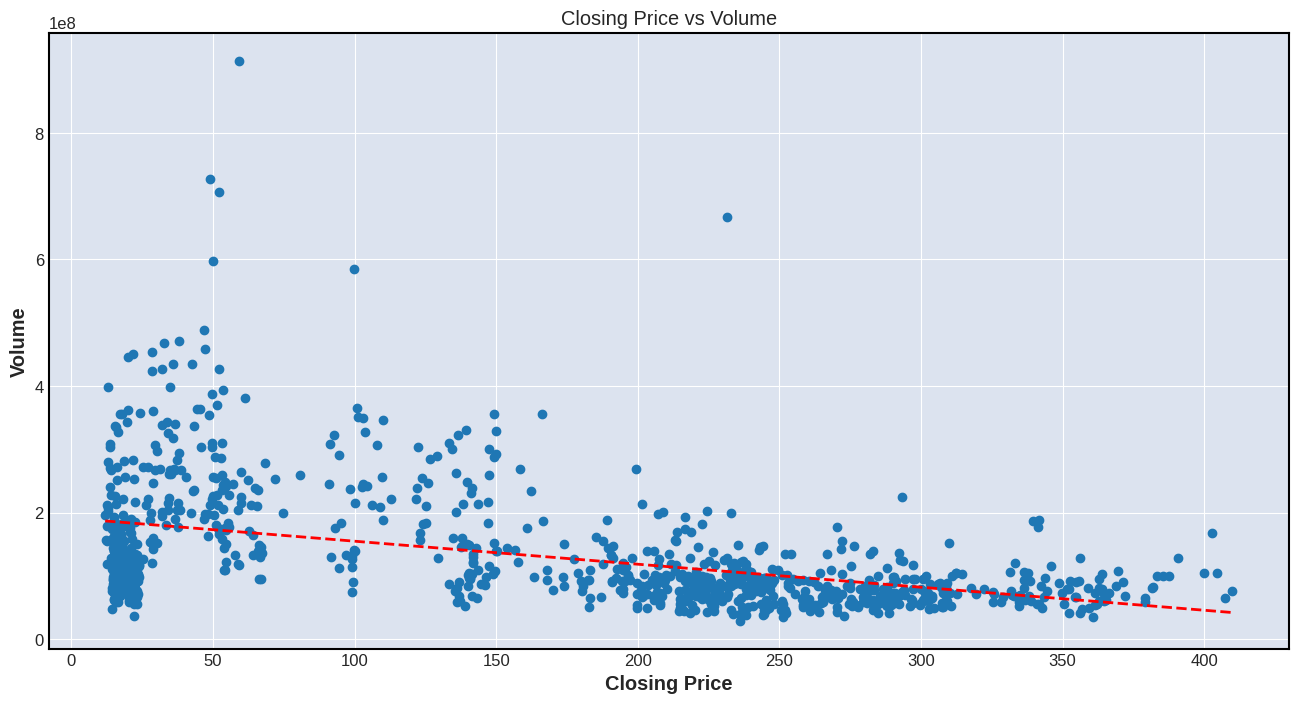

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the slope and intercept of the best fit line
slope, intercept = np.polyfit(df['Close'], df['Volume'], 1)

# Create a range of x values to plot the line
x_range = np.arange(df['Close'].min(), df['Close'].max())

# Calculate the y values for the line using the slope and intercept
y_values = slope * x_range + intercept

# Plot the scatter plot
plt.figure(figsize =(16,8))
plt.scatter(df['Close'], df['Volume'])

# Plot the line
plt.plot(x_range, y_values, 'r--')

plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.title('Closing Price vs Volume')
plt.show()
